In [4]:
# Grafik çıktılarının doğrudan Jupyter hücrelerinde gösterilmesi için
%matplotlib inline

In [5]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Veri setini yükle
train_dataset = pd.read_csv("digit-recognizer/train.csv")  # Eğitim veri seti
test_dataset = pd.read_csv("digit-recognizer/test.csv")    # Test veri seti

# Hedef ve özellikleri ayır
y_train = train_dataset.iloc[:, 0].values  # İlk sütun hedef değişken
X_train = train_dataset.iloc[:, 1:].values  # Geri kalan sütunlar eğitim verisi
X_test = test_dataset.values  # Test verisi

# Random Forest modelini oluştur ve eğit
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
predictions = random_forest.predict(X_test)

# Sonuçları bir CSV dosyasına kaydet
output = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions) + 1),
    "Label": predictions
})
output.to_csv('submission_random_forest.csv', index=False)

print("Model eğitildi ve tahminler 'submission_random_forest.csv' dosyasına kaydedildi.")


Model eğitildi ve tahminler 'submission_random_forest.csv' dosyasına kaydedildi.


In [6]:
# Veri setinin ilk 5 satırını inceleyerek genel bir bakış sağlayalım
print("Eğitim veri setinin ilk 5 satırı:")
print(train_dataset.head())


Eğitim veri setinin ilk 5 satırı:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel78

In [7]:
import numpy as np

# Hedef değişkenin veri tipi ayarlanıyor
target = y_train.astype(np.uint8)

# Görüntü verilerini modele uygun hale getirmek için yeniden şekillendiriliyor
X_train = np.array(X_train).reshape((-1, 1, 28, 28)).astype(np.uint8)
X_test = np.array(test_dataset).reshape((-1, 1, 28, 28)).astype(np.uint8)

print("Veriler yeniden şekillendirildi ve kullanıma hazır.")

Veriler yeniden şekillendirildi ve kullanıma hazır.


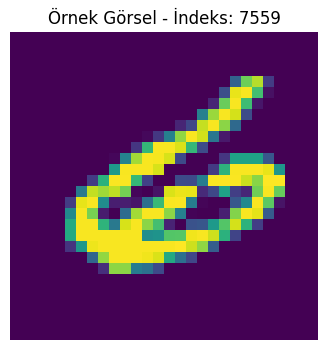

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Veri setindeki rastgele bir görüntüyü seç ve görselleştir
random_index = np.random.randint(0, len(X_train))  # Rastgele bir indeks seç
plt.figure(figsize=(4, 4))  # Grafik boyutunu belirle
plt.imshow(X_train[random_index][0], cmap='viridis')  # Renk haritasını değiştir
plt.title(f"Örnek Görsel - İndeks: {random_index}")  # Başlık ekle
plt.axis('off')  # Eksen çizgilerini kapat
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Model tanımlama
model = models.Sequential([
    # Giriş katmanı (Flatten yerine doğrudan ResNet gibi modeller de kullanılabilir)
    layers.InputLayer(input_shape=(28, 28, 1)),  # 28x28 gri görüntüler için
    layers.Flatten(),  # 28x28'i düzleştir
    
    # Gizli katmanlar
    layers.Dense(512, activation='relu'),  # İlk gizli katman
    layers.Dense(256, activation='relu'),  # İkinci gizli katman

    # Çıkış katmanı
    layers.Dense(10, activation='softmax')  # 10 sınıf tahmini (0-9 rakamları)
])

# Modelin özetini yazdır
model.summary()

# Modeli derleme
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizasyon algoritması
    loss='sparse_categorical_crossentropy',  # Kayıp fonksiyonu (etiketler tam sayı olmalı)
    metrics=['accuracy']  # Değerlendirme metrikleri
)

print("Model başarılı bir şekilde oluşturuldu.")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Model başarılı bir şekilde oluşturuldu.


In [11]:
epok = 60

# TensorFlow modelinin eğitimi
history = model.fit(
    X_train,  # Eğitim verisi
    y_train,  # Hedef (etiketler)
    epochs=epok,  # Eğitim için epok sayısı
    batch_size=32,  # Mini-batch boyutu
    validation_split=0.2,  # Doğrulama için veri ayırma oranı (%20)
    verbose=1  # Eğitim sürecinde detaylı çıktı
)

Epoch 1/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8407 - loss: 6.7342 - val_accuracy: 0.9121 - val_loss: 0.5118
Epoch 2/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9409 - loss: 0.3054 - val_accuracy: 0.9305 - val_loss: 0.3361
Epoch 3/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9563 - loss: 0.1812 - val_accuracy: 0.9430 - val_loss: 0.3182
Epoch 4/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9580 - loss: 0.1744 - val_accuracy: 0.9445 - val_loss: 0.2411
Epoch 5/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9616 - loss: 0.1435 - val_accuracy: 0.9535 - val_loss: 0.1996
Epoch 6/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9638 - loss: 0.1303 - val_accuracy: 0.9549 - val_loss: 0.2072
Epoch 7/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9652 - loss: 0.1324 - val_accuracy: 0.9556 - val_loss: 0.1937
Epoch 8/60
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9741 - loss: 0.0977 - 

In [13]:
from tensorflow.keras.models import save_model

model_name = f"{epok}_epoch_model.h5"

# Eğitimi tamamlanan modeli kaydetme
model.save(model_name)

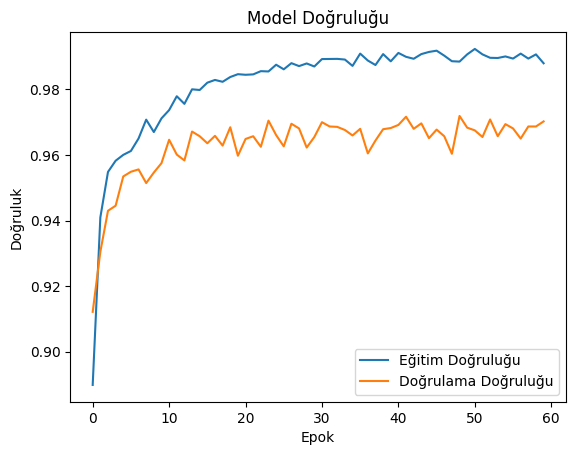

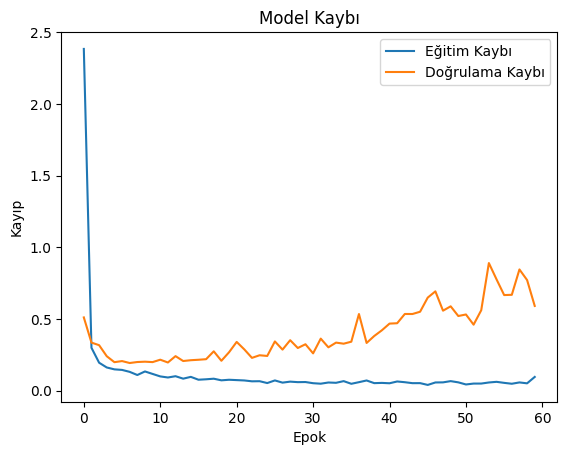

In [14]:
import matplotlib.pyplot as plt



# Doğruluk görselleştirme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
from sklearn.model_selection import train_test_split

# Eğitim verilerini ve etiketlerini ayır (train.csv'den)
y = train_dataset["label"].values  # Etiketler
X = train_dataset.drop("label", axis=1).values  # Piksel değerleri

# Verileri normalleştir ve yeniden şekillendir
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Eğitim ve doğrulama setlerini ayır
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Eğitim veri boyutu:", X_train.shape)
print("Doğrulama veri boyutu:", X_val.shape)


Eğitim veri boyutu: (33600, 28, 28, 1)
Doğrulama veri boyutu: (8400, 28, 28, 1)


In [10]:
# Doğrulama setinden rastgele 5 veri seç
random_indices = random.sample(range(len(X_val)), 5)
selected_images = X_val[random_indices]  # Rastgele seçilen görüntüler
selected_labels = y_val[random_indices]  # Gerçek etiketler

print("Seçilen 5 rastgele veri: ", random_indices)

Seçilen 5 rastgele veri:  [2747, 6201, 4255, 1675, 1900]


In [ ]:
#----------------------------------------------------

from tensorflow.keras.models import load_model

# Kaydedilen modeli yükleme
model = load_model('60_epoch_model.h5')
# model = load_model('20_epoch_model.h5')

#----------------------------------------------------

# Model ile tahmin yap
predicted_labels = np.argmax(model.predict(selected_images), axis=1)

print("Modelin tahmin ettiği etiketler: ", predicted_labels)
print("Gerçek etiketler: ", selected_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Modelin tahmin ettiği etiketler:  [2 9 8 3 8]
Gerçek etiketler:  [2 4 8 7 8]


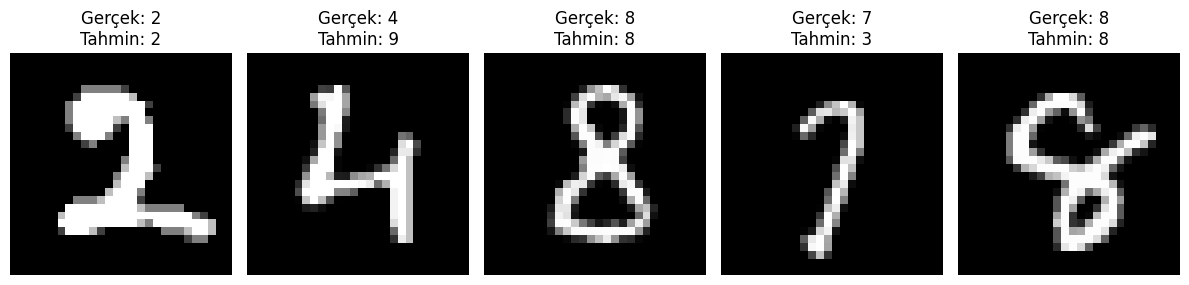

In [12]:
# Tahmin ve gerçek etiketleri görselleştir
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {selected_labels[i]}\nTahmin: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Eğitim doğruluğunu almak için
training_accuracy = max(history.history['accuracy']) * 100
print(f"Eğitim Doğruluğu: %{training_accuracy:.2f}")

TypeError: 'History' object is not subscriptable

In [21]:
# Doğrulama doğruluğunu almak için
validation_accuracy = max(history.history['val_accuracy']) * 100
print(f"Doğrulama Doğruluğu: %{validation_accuracy:.2f}")

Doğrulama Doğruluğu: %97.19
